# Data Visualization 

## Imports

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

df = pd.read_csv('dsa210projedata.csv')



## Team Standings by Points

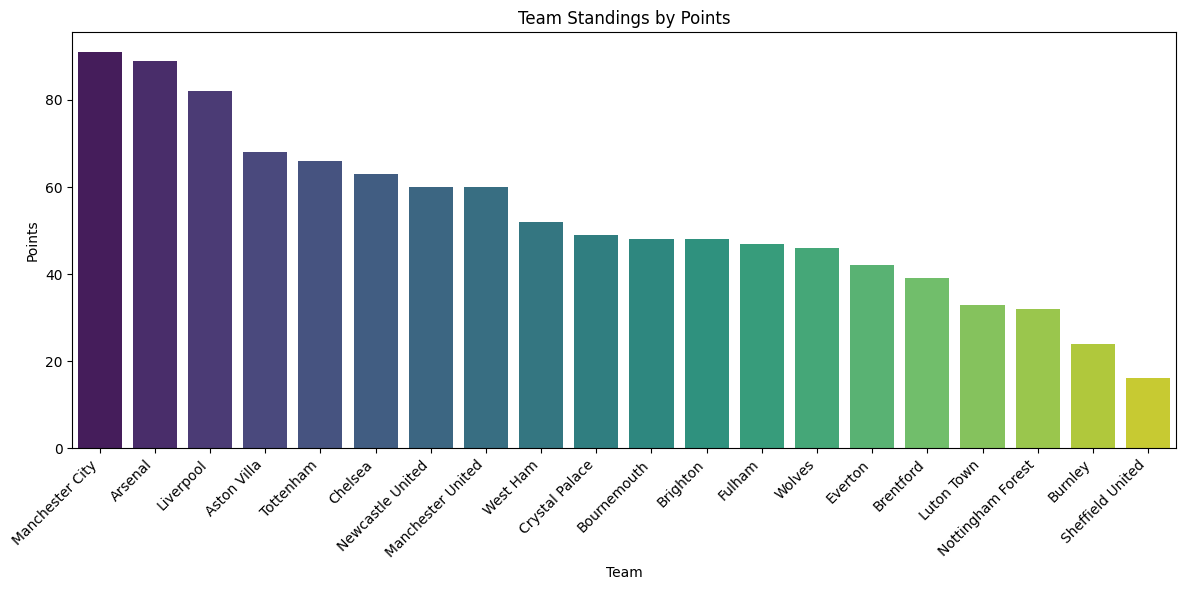

In [51]:
# Team Standings
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='Points', ascending=False), x='Team', y='Points', palette='viridis')
plt.title('Team Standings by Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Goal Performance (Goals Scored vs Conceded)

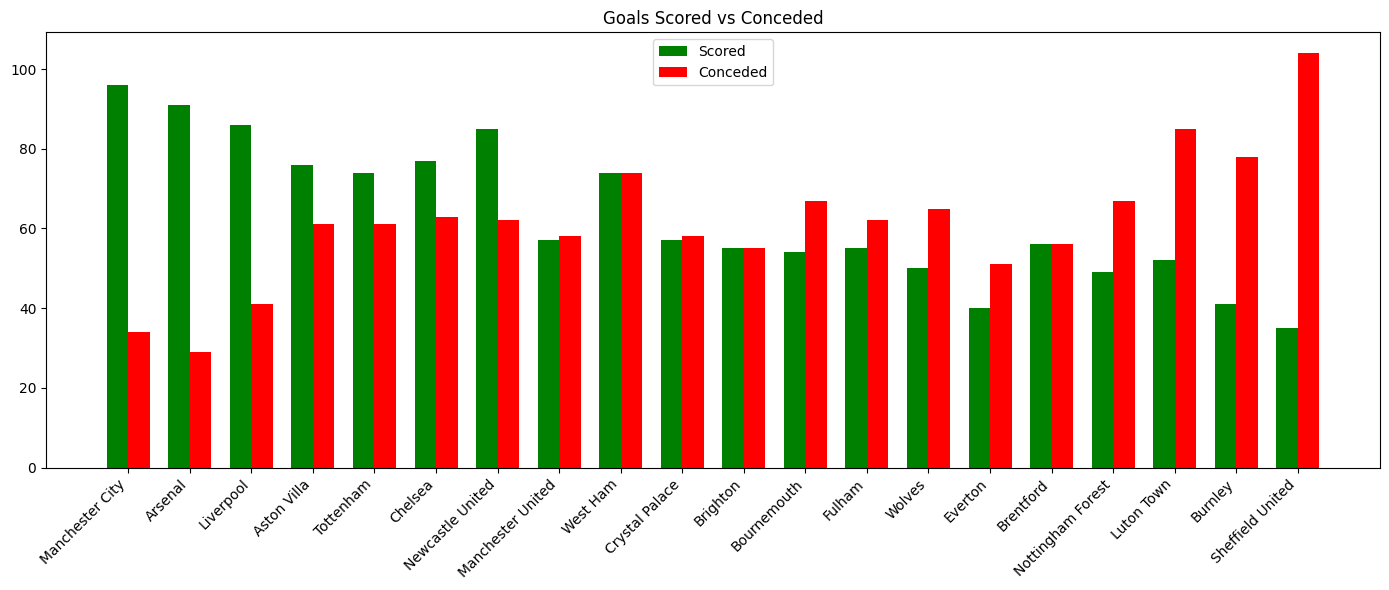

In [52]:
# Goal Performance
plt.figure(figsize=(14, 6))
x = np.arange(len(df['Team']))
width = 0.35
plt.bar(x - width/2, df['Goals Scored'], width, label='Scored', color='green')
plt.bar(x + width/2, df['Goals Conceded'], width, label='Conceded', color='red')
plt.xticks(x, df['Team'], rotation=45, ha='right')
plt.title('Goals Scored vs Conceded')
plt.legend()
plt.tight_layout()
plt.show()


## Ball Possession vs Points

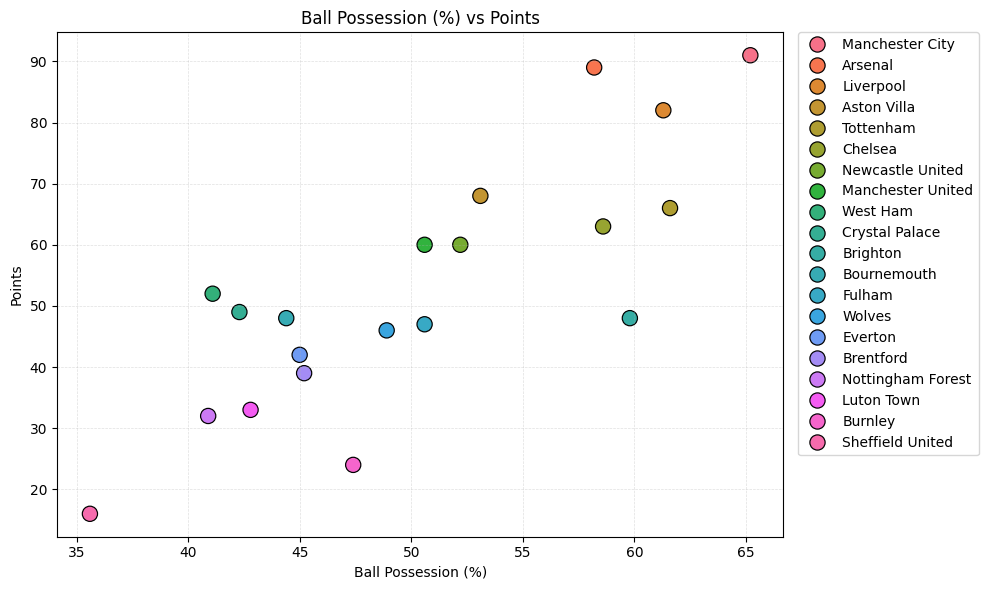

In [53]:
# Possession vs Points
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Ball Possession (%)', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Ball Possession (%) vs Points')
plt.xlabel('Ball Possession (%)')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Squad Efficiency (Points / Squad Value) vs Points

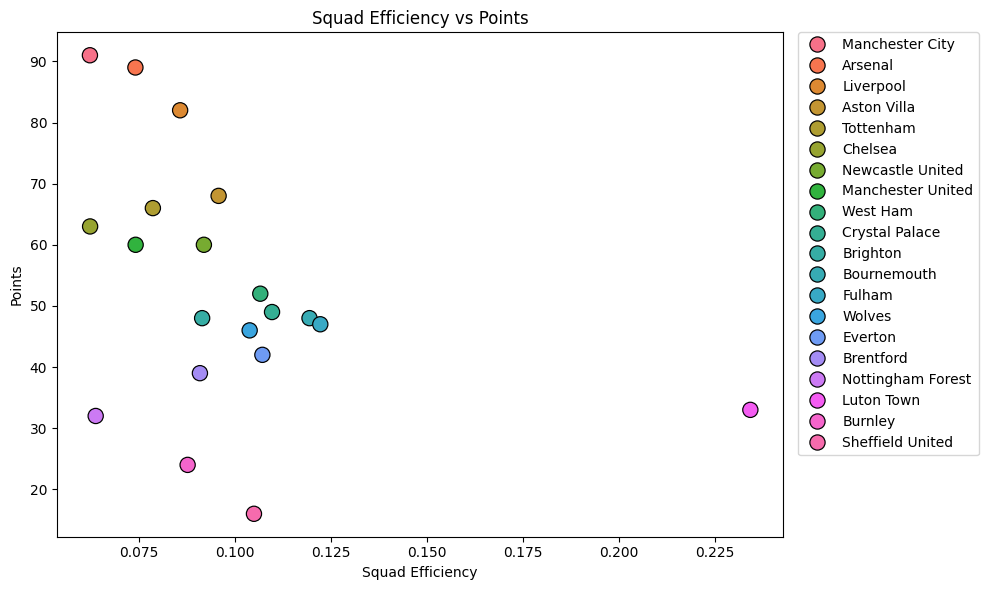

In [54]:
# Squad Efficiency vs Points
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Squad Efficiency', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Squad Efficiency vs Points')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()




## Age Distribution vs Points

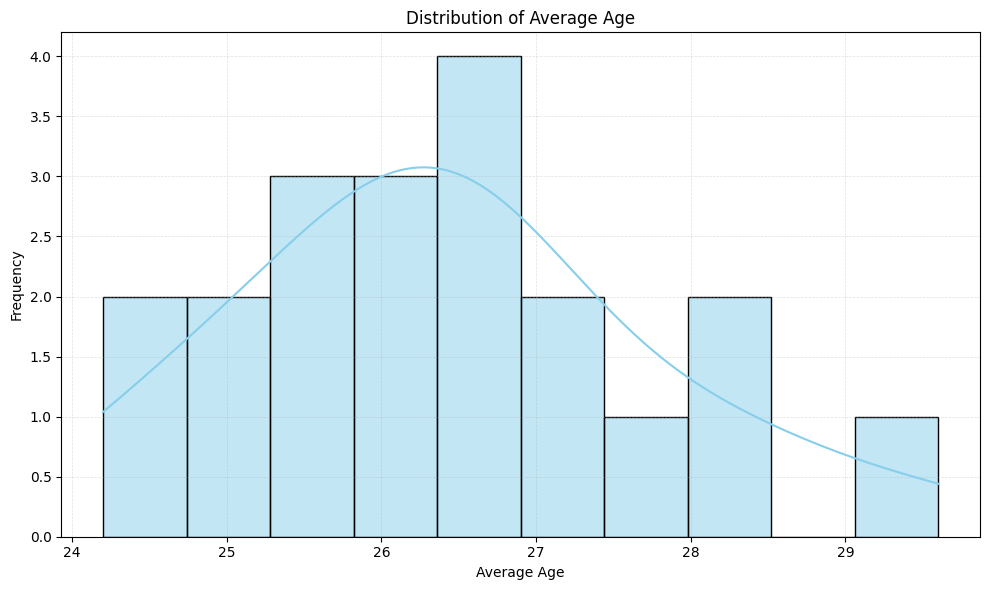

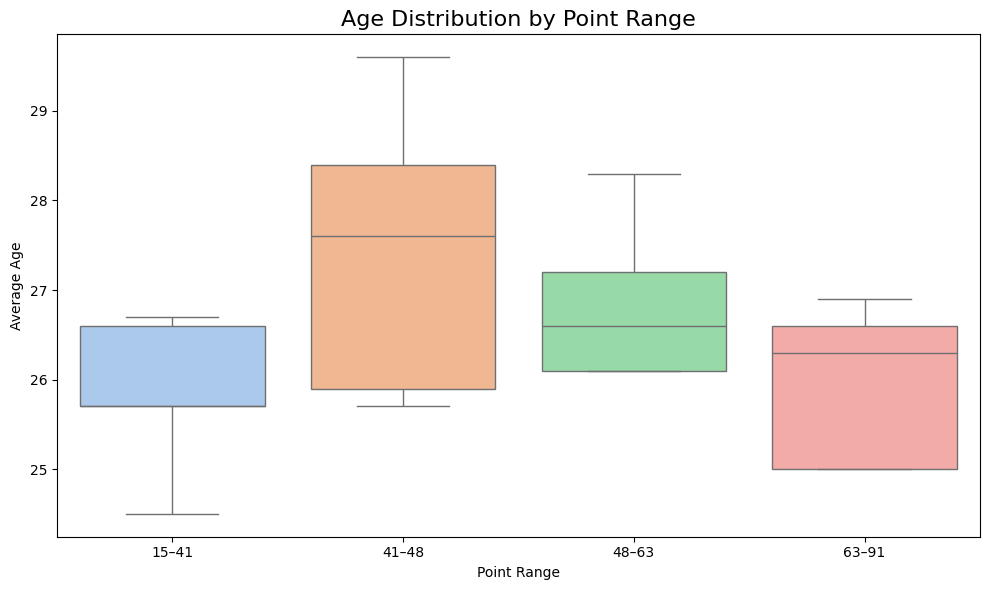

In [55]:
# Age vs Performance
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Age'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Age')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()

df['Point_Category'] = pd.qcut(df['Points'], q=4)
df['Point_Category_Label'] = df['Point_Category'].apply(lambda x: f"{int(x.left)}–{int(x.right)}")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Point_Category_Label', y='Average Age', showfliers=False, palette='pastel')
plt.title('Age Distribution by Point Range', fontsize=16)
plt.xlabel('Point Range')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()


## Goal Difference (Goals Scored - Goals Conceded) by Teams

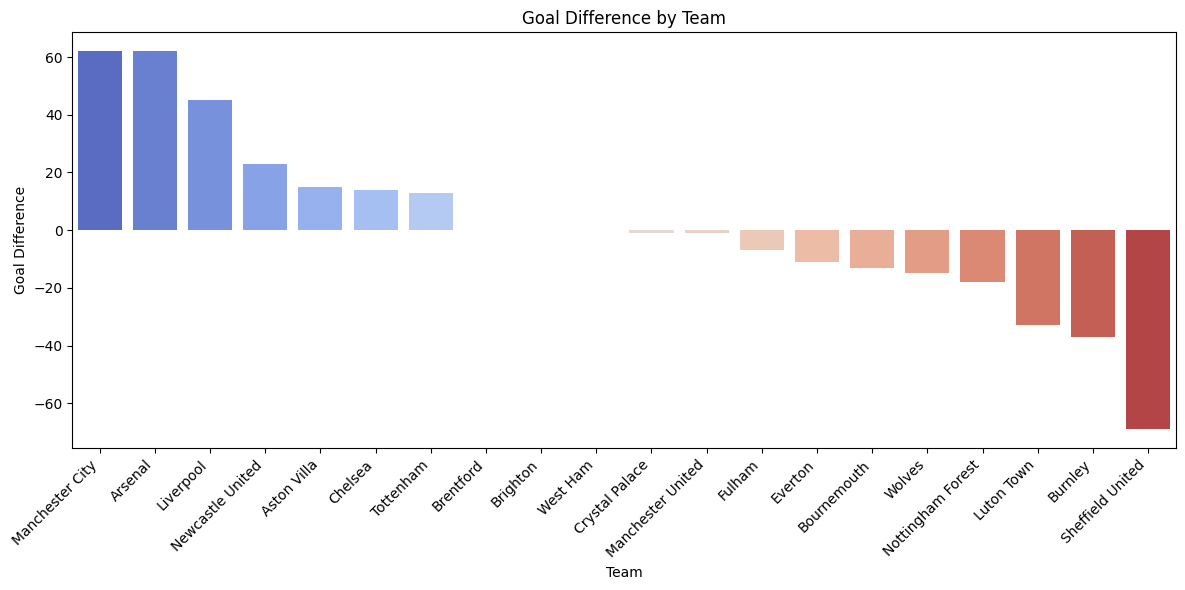

In [56]:
# Goal Difference
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='Goal Difference', ascending=False), x='Team', y='Goal Difference', palette='coolwarm')
plt.title('Goal Difference by Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Foreign Player Ratio vs Points

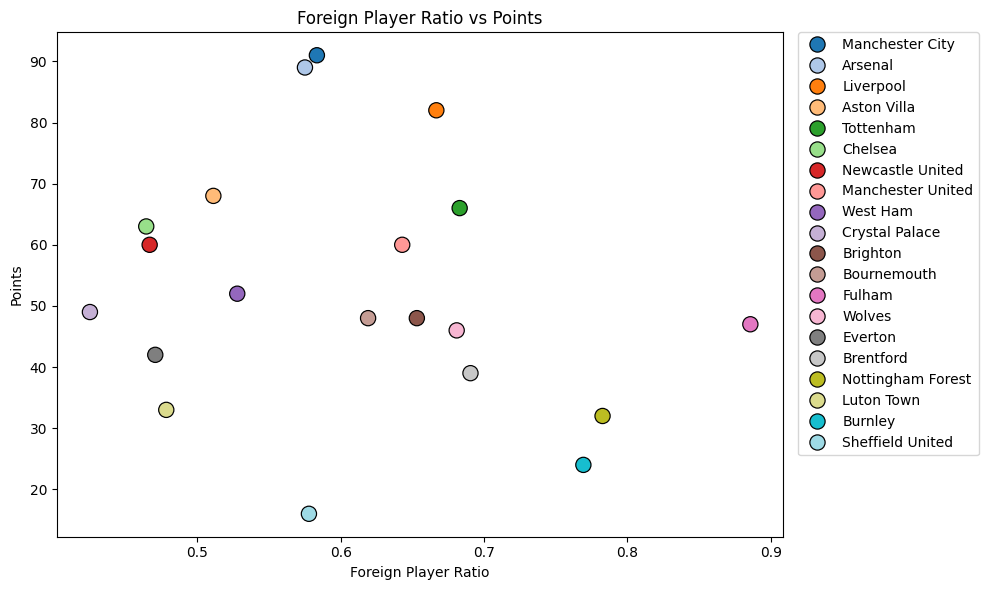

In [57]:
# Foreign Player Ratio vs Points (scatter)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Foreign Player Ratio', y='Points', hue='Team', s=120, edgecolor='black', palette='tab20')
plt.title('Foreign Player Ratio vs Points')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


## Correlation Matrix

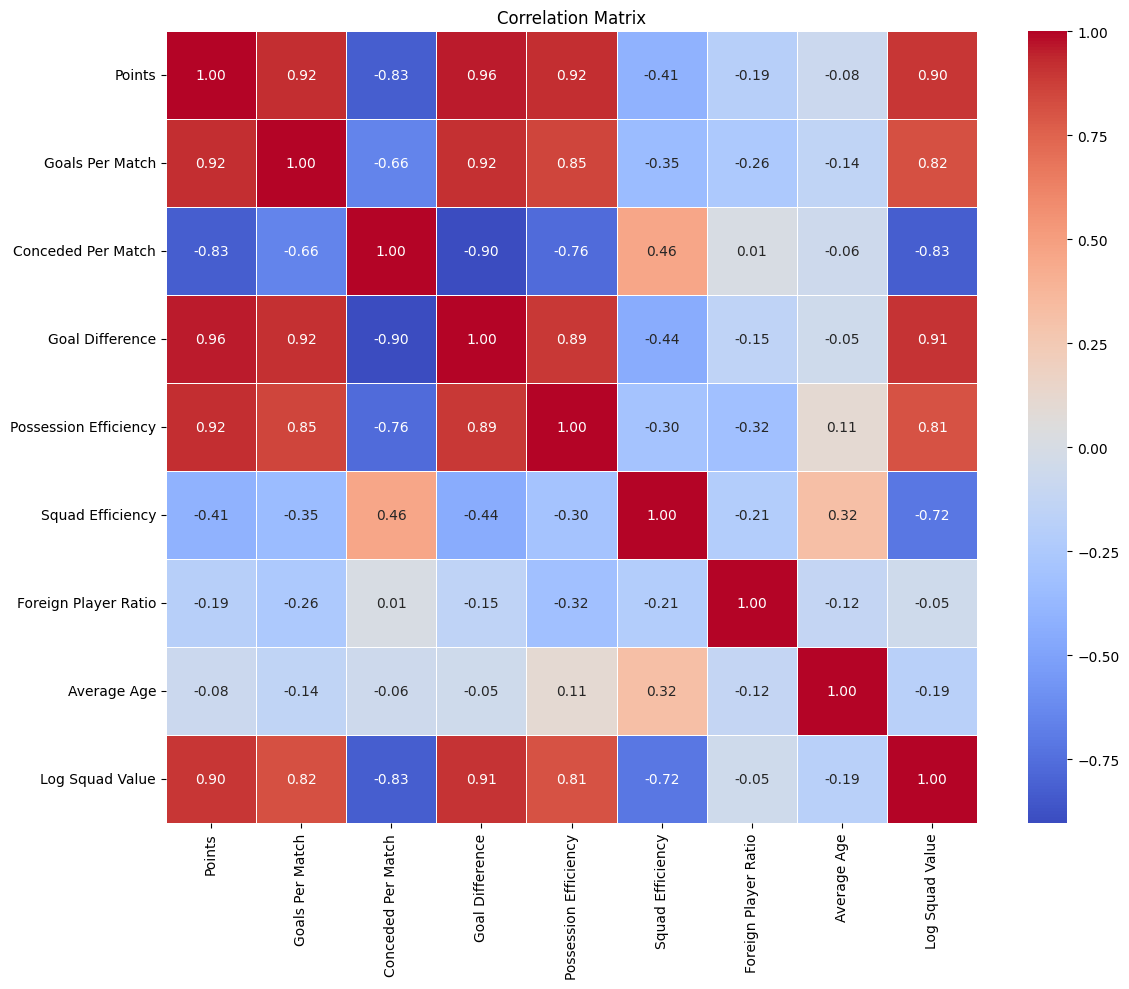

In [58]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr_cols = [
    'Points', 'Goals Per Match', 'Conceded Per Match', 'Goal Difference',
    'Possession Efficiency', 'Squad Efficiency', 'Foreign Player Ratio',
    'Average Age', 'Log Squad Value'
]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Hypothesis 1: Log Squad Value vs Points

### H0 : There is no correlation between Log Squad Value and Points.
### H1 : There is a correlation between Log Squad Value and Points.


📊 Hypothesis 1: Log Squad Value vs Points
Pearson Corr: 0.90 | P-value: 0.0000
→ ✅ Significant, p < 0.05 , Reject H0


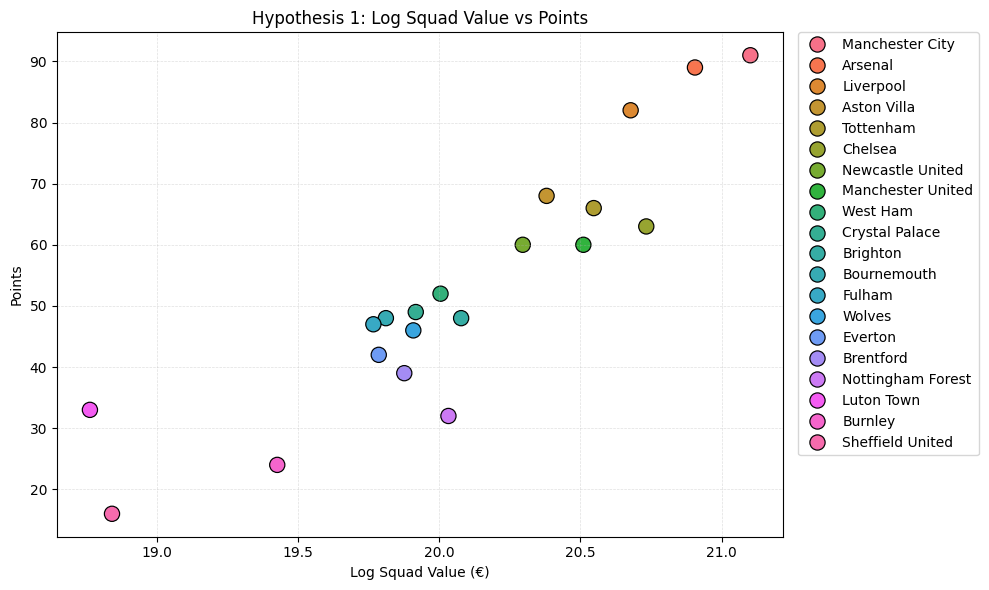

In [59]:
# Hypothesis 1: Log Squad Value vs Points
corr_logval, p_logval = pearsonr(df['Log Squad Value'], df['Points'])
print("\n📊 Hypothesis 1: Log Squad Value vs Points")
print(f"Pearson Corr: {corr_logval:.2f} | P-value: {p_logval:.4f}")
print("→", "✅ Significant, p < 0.05 , Reject H0" if p_logval < 0.05 else "❌ Not Significant, p > 0.05 , Fail to reject H0")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log Squad Value', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Hypothesis 1: Log Squad Value vs Points')
plt.xlabel('Log Squad Value (€)')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Hypothesis 2: Foreign Players Ratio vs Points

### H0 : There is no correlation between Foreign Player Ratio and Points.
### H1 : There is a correlation between Foreign Player Ratio and Points.




📊 Hypothesis 2: Foreign Players Ratio vs Points
Pearson Corr: -0.19 | P-value: 0.4178
→ ❌ Not Significant, p > 0.05, Fail to Reject H0


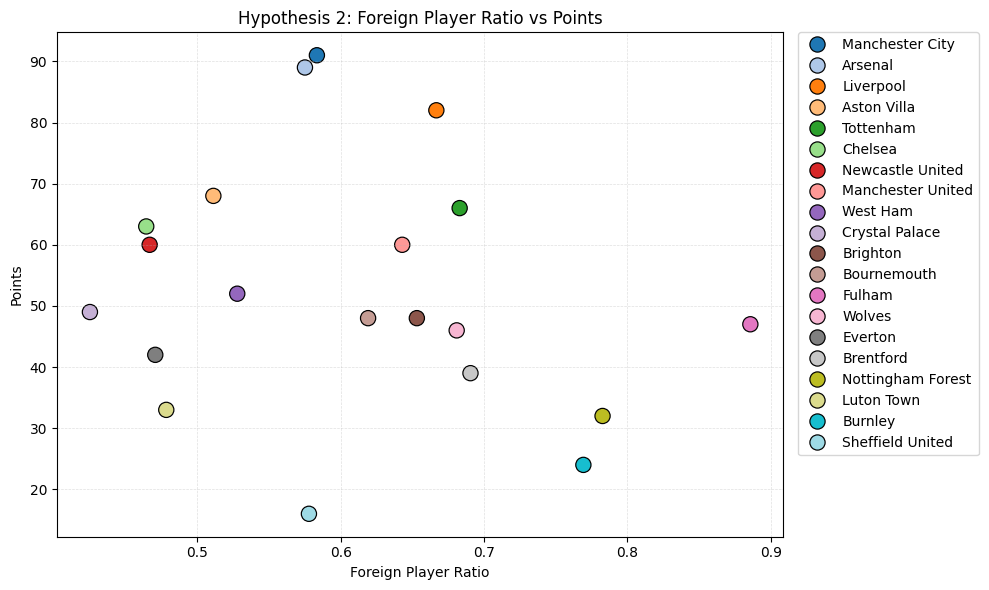

In [60]:
# Hypothesis 2: Foreign Players Ratio vs Points
corr_fpr, p_fpr = pearsonr(df['Foreign Player Ratio'], df['Points'])
print("\n📊 Hypothesis 2: Foreign Players Ratio vs Points")
print(f"Pearson Corr: {corr_fpr:.2f} | P-value: {p_fpr:.4f}")
print("→", "✅ Significant, p < 0.05, Reject H0" if p_fpr < 0.05 else "❌ Not Significant, p > 0.05, Fail to Reject H0")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Foreign Player Ratio', y='Points', hue='Team', s=120, edgecolor='black', palette='tab20')
plt.title('Hypothesis 2: Foreign Player Ratio vs Points')
plt.xlabel('Foreign Player Ratio')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

## Hypothesis 3: Conceded Per Match vs Points

### H0 : There is no correlation between Conceded per Match and Points.
### H1 : There is correlation between Conceded per Match and Points.


📊 Hypothesis 3: Conceded Per Match vs Points
Pearson Corr: -0.83 | P-value: 0.0000
→ ✅ Significant, p < 0.05 , Reject H0


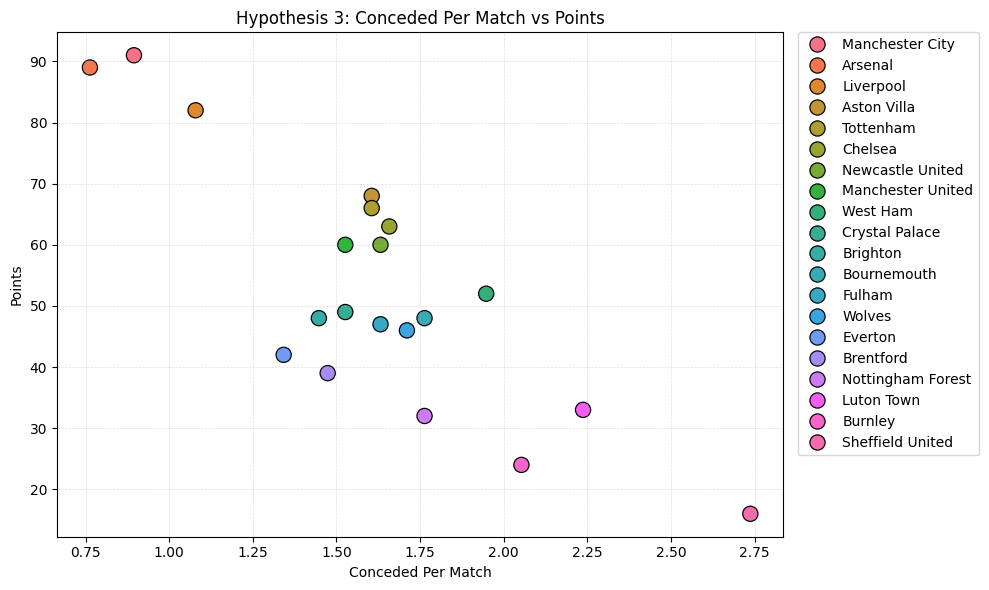

In [61]:
# Hypothesis 3: Conceded Per Match vs Points
corr_conc, p_conc = pearsonr(df['Conceded Per Match'], df['Points'])
print("\n📊 Hypothesis 3: Conceded Per Match vs Points")
print(f"Pearson Corr: {corr_conc:.2f} | P-value: {p_conc:.4f}")
print("→", "✅ Significant, p < 0.05 , Reject H0" if p_conc < 0.05 else "❌ Not Significant, p > 0.05 , Fail to reject H0")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Conceded Per Match', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Hypothesis 3: Conceded Per Match vs Points')
plt.xlabel('Conceded Per Match')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

### Hypothesis 4: Possession Efficiency vs Points

### H0 : There is no correlation between Possession Efficiency (Points/Ball Possession) and Points.
### H1: There is correlation between Possession Efficiency (Points/Ball Possession) and Points.


📊 Hypothesis 4: Possession Efficiency vs Points
Pearson Corr: 0.92 | P-value: 0.0000
→ ✅ Significant, p < 0.05, Reject H0


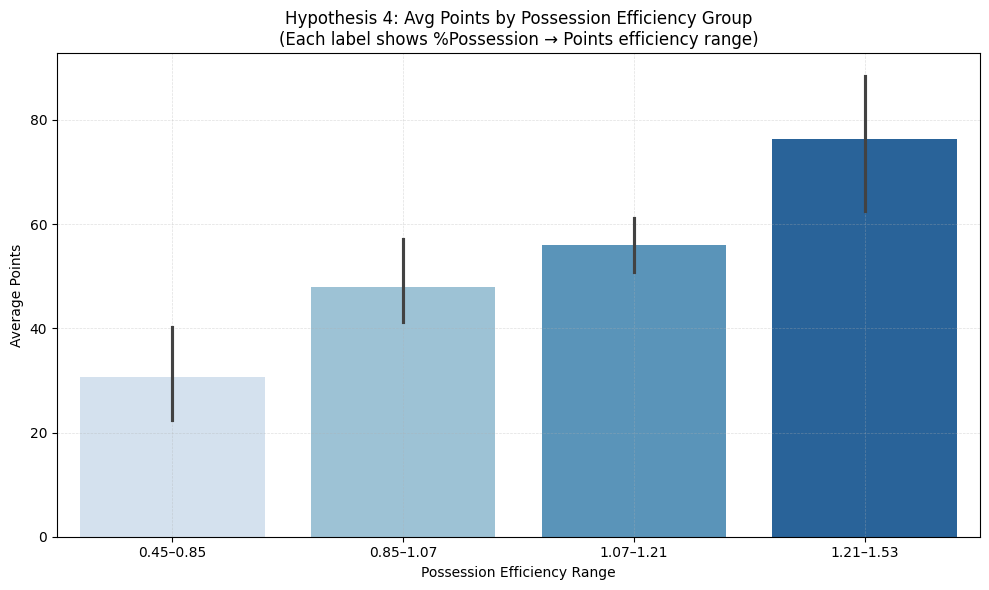

In [62]:
# Hypothesis 4: Possession Efficiency vs Points
corr_pe, p_pe = pearsonr(df['Possession Efficiency'], df['Points'])
print("\n📊 Hypothesis 4: Possession Efficiency vs Points")
print(f"Pearson Corr: {corr_pe:.2f} | P-value: {p_pe:.4f}")
print("→", "✅ Significant, p < 0.05, Reject H0" if p_pe < 0.05 else "❌ Not Significant, p > 0.05, Fail to Reject H0")
df['Possession Efficiency Group'] = pd.qcut(df['Possession Efficiency'], q=4)
df['Possession Efficiency Label'] = df['Possession Efficiency Group'].apply(
    lambda x: f"{x.left:.2f}–{x.right:.2f}"
)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Possession Efficiency Label', y='Points', estimator='mean', palette='Blues')
plt.title('Hypothesis 4: Avg Points by Possession Efficiency Group\n(Each label shows %Possession → Points efficiency range)')
plt.xlabel('Possession Efficiency Range')
plt.ylabel('Average Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()

# Machine Learning Model


Linear Regression Results:
 - Mean Squared Error: 111.78
 - R² Score: 0.85


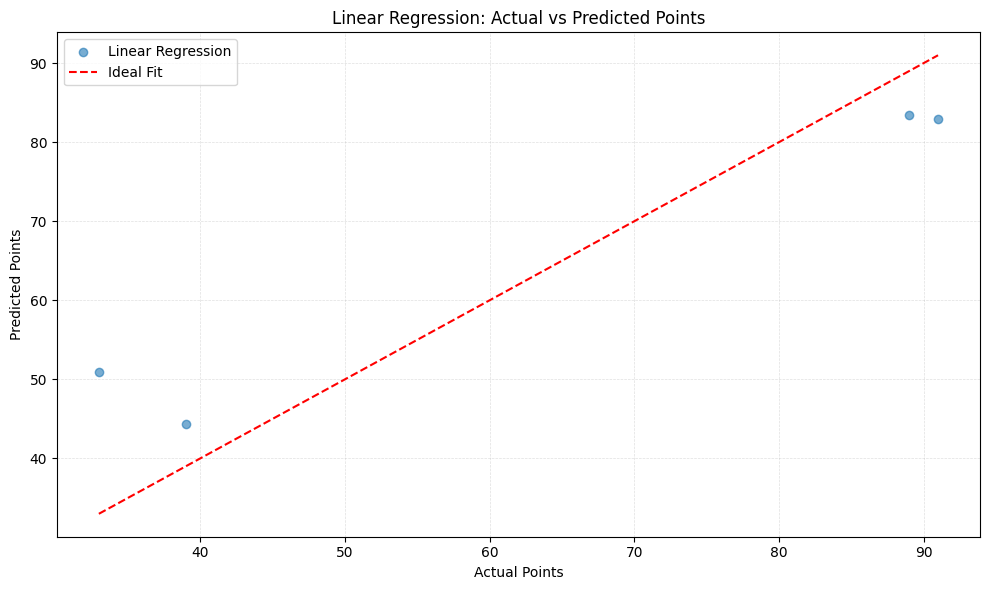


Decision Tree Results:
 - Mean Squared Error: 48.75
 - R² Score: 0.93


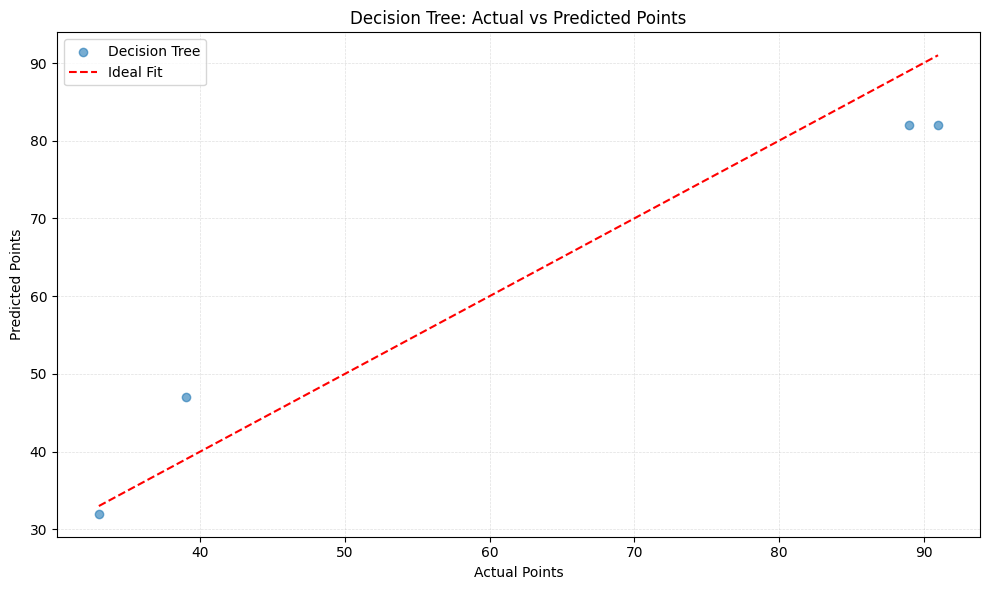


Random Forest Results:
 - Mean Squared Error: 144.25
 - R² Score: 0.80


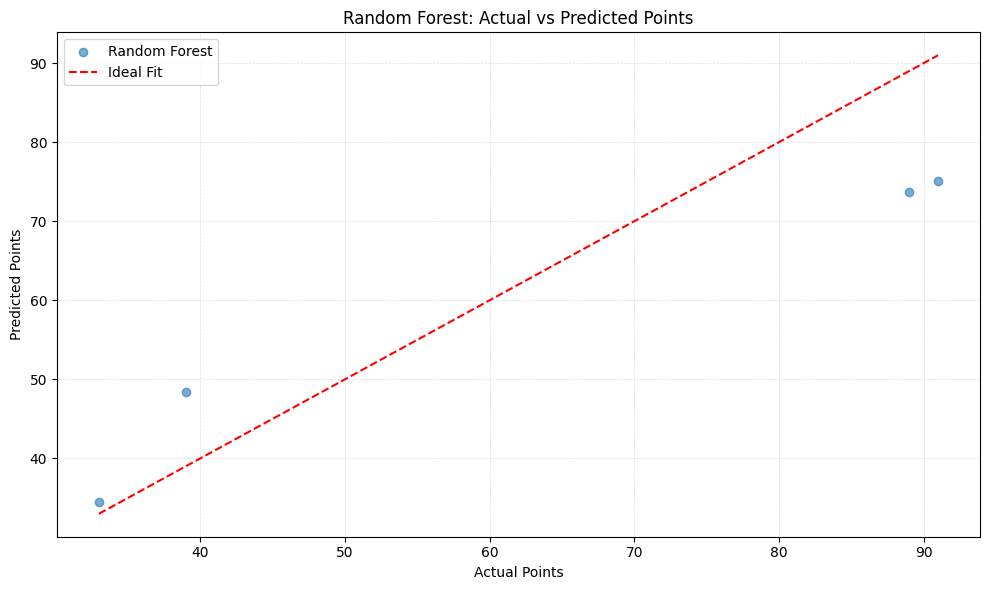

Best Performing Model: Decision Tree with R² = 0.93


In [63]:
# Target variable: Points
y = df['Points']

# Features: Selected based on high correlation and logical relevance
features = [
    'Log Squad Value',
    'Foreign Player Ratio',
    'Conceded Per Match',
    'Goals Per Match',
    'Goal Difference',
    'Possession Efficiency',
    'Squad Efficiency',
    'Average Age'
]

X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

# Collect results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)                    # Train
    y_pred = model.predict(X_test)                 # Predict
    mse = mean_squared_error(y_test, y_pred)       # Mean Squared Error
    r2 = r2_score(y_test, y_pred)                  # R-squared Score
    results[name] = {"MSE": mse, "R²": r2}

    print(f"\n{name} Results:")
    print(f" - Mean Squared Error: {mse:.2f}")
    print(f" - R² Score: {r2:.2f}")

    # Scatter Plot: Actual vs Predicted Points
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{name}: Actual vs Predicted Points")
    plt.xlabel("Actual Points")
    plt.ylabel("Predicted Points")
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
    plt.tight_layout()
    plt.show()

# Best performing model
best_model = max(results, key=lambda x: results[x]['R²'])
print(f"Best Performing Model: {best_model} with R² = {results[best_model]['R²']:.2f}")



def test_correlation(x, y, x_label, y_label):
    corr, p = pearsonr(x, y)
    print(f"\n📈 Pearson Correlation Test: {x_label} vs {y_label}")
    print(f"Pearson Correlation Coefficient: {corr:.2f}")
    print(f"P-Value: {p:.4f}")
    if p < 0.05:
        print("✅ Significant correlation (reject H0)")
    else:
        print("❌ Not significant (fail to reject H0)")
